### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv('data/Whickham.txt')

In [3]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


# Accuracy as a function of train-test-split
Now, test to see how altering the relative size of the train-test split alters things

In [5]:
universal_random_seed = 1000

In [6]:
X = data[['smoker', 'age']]
X['smoker'] = X['smoker'].map({'Yes': 1, 'No': 0})
y = data['outcome']
stratify_col = X['smoker'].astype(str) + "_" + y.astype(str)
stratify_col.value_counts()

C:\Users\matth\AppData\Local\Temp\ipykernel_20792\669398661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'Yes': 1, 'No': 0})


0_Alive    502
1_Alive    443
0_Dead     230
1_Dead     139
Name: count, dtype: int64

In [7]:
train_size = np.linspace(.1, .9, 9)
max_depths = list(range(1, 16)) # iterate over max depth

accuracy_dict = {}

for temp_size in train_size:
    accuracy_dict[temp_size] = {'train_score': [], 'test_score': []} # this time, instantiate train_score and test_score as empty lists onto which I will append accuracy values
    temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X, y, train_size = temp_size, random_state = universal_random_seed, stratify = stratify_col)
   
    for temp_depth in max_depths:
        temp_tree = DecisionTreeClassifier(max_depth = temp_depth).fit(temp_X_train, temp_y_train)
        
        accuracy_dict[temp_size]['train_score'].append(temp_tree.score(temp_X_train, temp_y_train))
        accuracy_dict[temp_size]['test_score'].append(temp_tree.score(temp_X_test, temp_y_test))

accuracy_dict[train_size[1]]

{'train_score': [0.8587786259541985,
  0.8587786259541985,
  0.8625954198473282,
  0.8816793893129771,
  0.8969465648854962,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259,
  0.9007633587786259],
 'test_score': [0.8288973384030418,
  0.8288973384030418,
  0.8384030418250951,
  0.8307984790874525,
  0.8136882129277566,
  0.8212927756653993,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364,
  0.8279467680608364]}

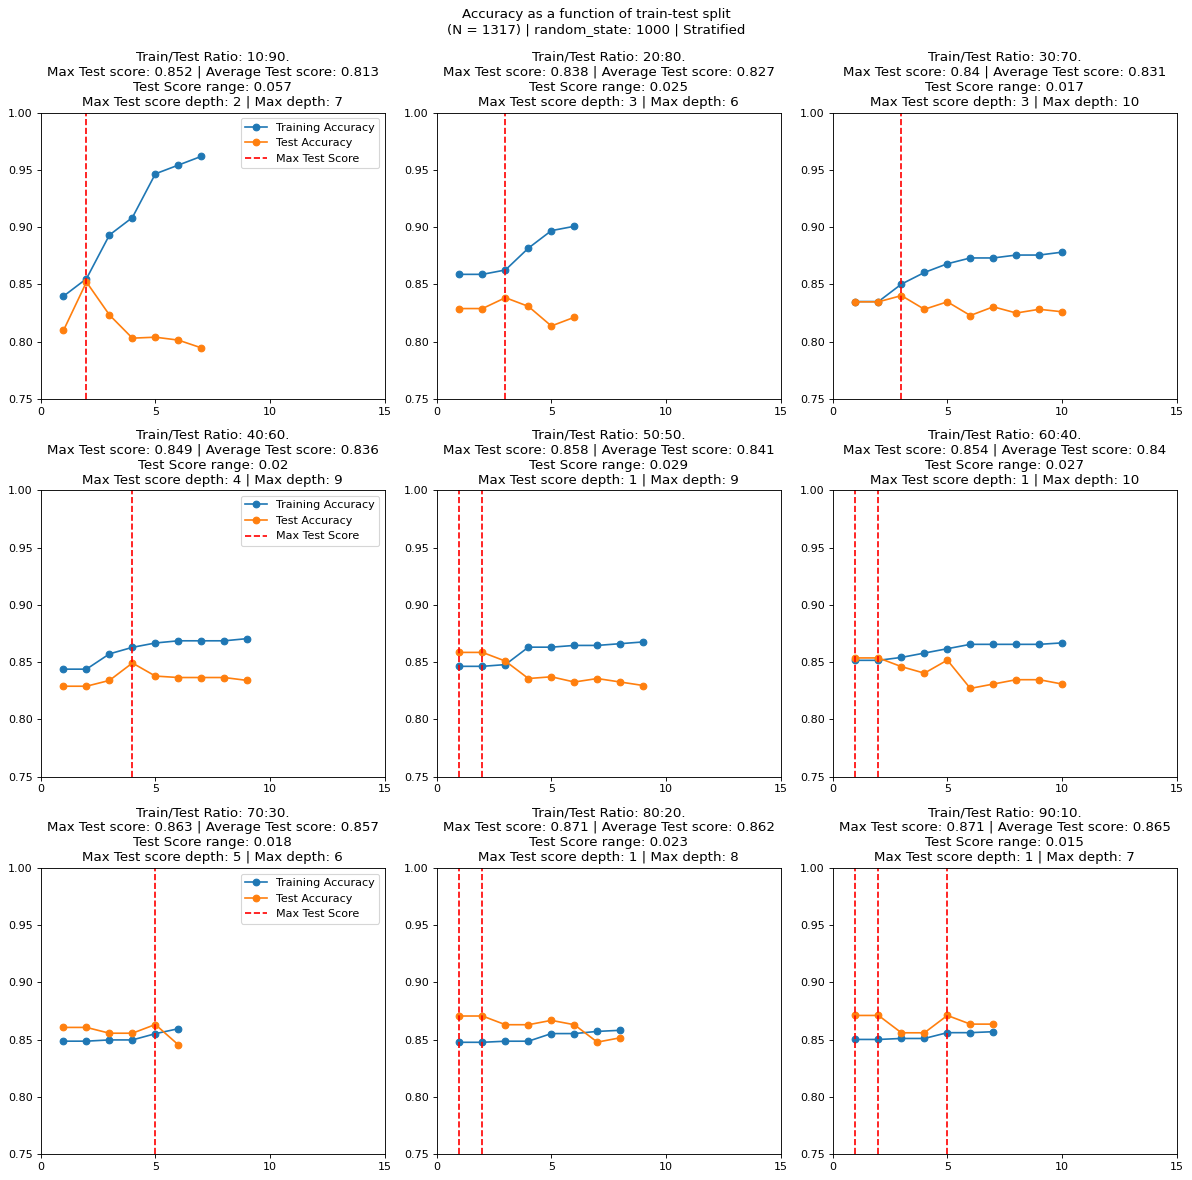

In [8]:
# create graphs
plt.figure(figsize = (15, 15), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.suptitle(f'Accuracy as a function of train-test split\n(N = 1317) | random_state: {universal_random_seed} | Stratified\n')

ax_count = 1
for train_size in list(accuracy_dict.keys()):
    temp_test_scores = accuracy_dict[train_size]['test_score']
    temp_train_scores = accuracy_dict[train_size]['train_score']

    # reshape scores, to only include non-repeated training scores (where nodes have all become pure)
    temp_max_train_index = np.min( np.array(range(1,16))[temp_train_scores == np.max(temp_train_scores)] ) # this becomes final value
    #temp_index = list(range(0, temp_max_train_index))

    temp_test_scores = temp_test_scores[0:temp_max_train_index]
    temp_train_scores = temp_train_scores[0:temp_max_train_index]
    
    plt.subplot(3, 3, ax_count)
    plt.plot(list(range(1, temp_max_train_index+1)), temp_train_scores, label = 'Training Accuracy', marker = 'o')
    plt.plot(list(range(1, temp_max_train_index+1)), temp_test_scores, label = 'Test Accuracy', marker = 'o')
    
    max_test_scores = np.array(range(1, temp_max_train_index+1))[temp_test_scores == np.max(temp_test_scores)]
    max_score_count = 1
    for max_test_score in max_test_scores:
        if max_score_count == 1:
            first_max_test_score = max_test_score
            plt.axvline(x = max_test_score, color = 'red', linestyle = '--', label = 'Max Test Score')
        else:
            plt.axvline(x = max_test_score, color = 'red', linestyle = '--')
        max_score_count += 1
    temp_train_prop = int(round(train_size*100,0))
    
    plt.title(f'Train/Test Ratio: {temp_train_prop}:{100-temp_train_prop}.\nMax Test score: {round(np.max(temp_test_scores),3)} | Average Test score: {round(np.mean(temp_test_scores),3)}\nTest Score range: {round(np.max(temp_test_scores)-np.min(temp_test_scores),3)}\nMax Test score depth: {first_max_test_score} | Max depth: {temp_max_train_index}')
    if ax_count % 3 == 1:
        plt.legend()
    plt.ylim(bottom = 0.75, top = 1)
    plt.xlim((0, 10))
    plt.xticks([0, 5, 10, 15])
    ax_count += 1

plt.tight_layout()
plt.savefig('accuracy_plots_trainProportion.png')

What do the decision trees look like for the final depths?

[]

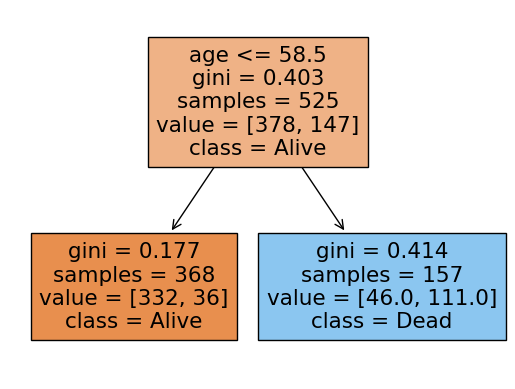

In [9]:
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X, y, train_size = .4, random_state = universal_random_seed, stratify = stratify_col)

dtree = DecisionTreeClassifier(max_depth = 1).fit(temp_X_train, temp_y_train)
plot_tree(dtree, feature_names = ['smoking', 'age'], class_names = ['Alive', 'Dead'], filled = True)
plt.plot()

[]

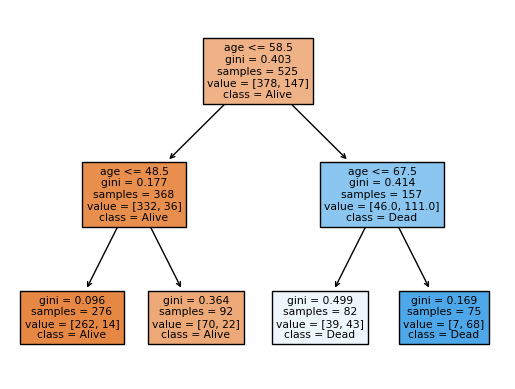

In [10]:
dtree = DecisionTreeClassifier(max_depth = 2).fit(temp_X_train, temp_y_train)
plot_tree(dtree, feature_names = ['smoking', 'age'], class_names = ['Alive', 'Dead'], filled = True)
plt.plot()

[]

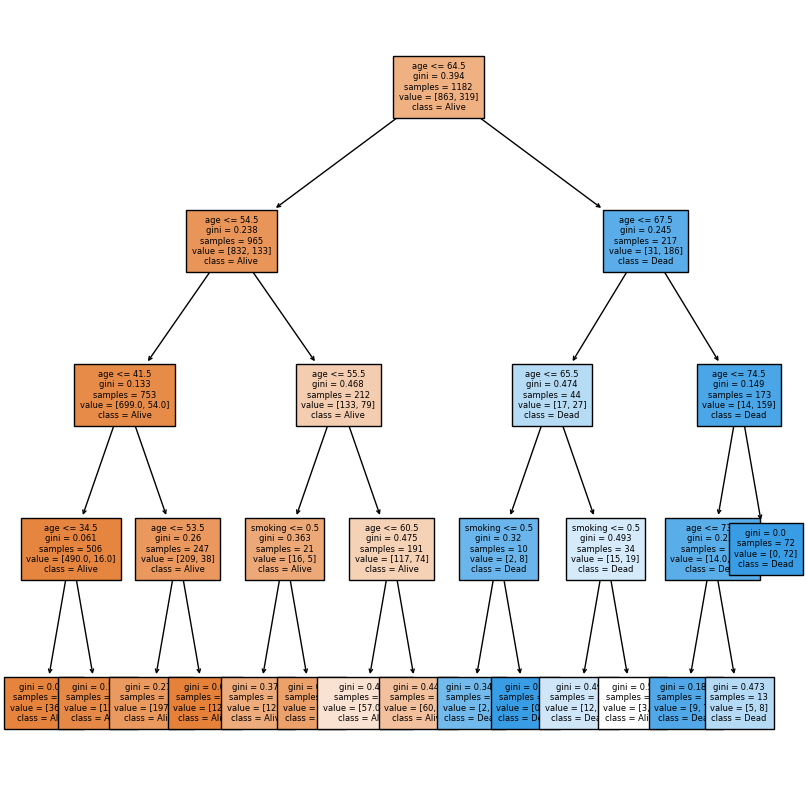

In [15]:
dtree = DecisionTreeClassifier(max_depth = 4).fit(temp_X_train, temp_y_train)
#plot_tree(dtree, feature_names = ['smoking', 'age'], class_names = ['Alive', 'Dead'], filled = True)
#plt.plot()

fig, ax = plt.subplots(figsize = (10, 10))
plot_tree(dtree, feature_names = ['smoking', 'age'], class_names = ['Alive', 'Dead'], filled = True,
              ax = ax, fontsize = 6)
plt.plot()

I noticed that the range seemed to vary systematically when random_seed was 42, from previous runs. Re-doing above work here.

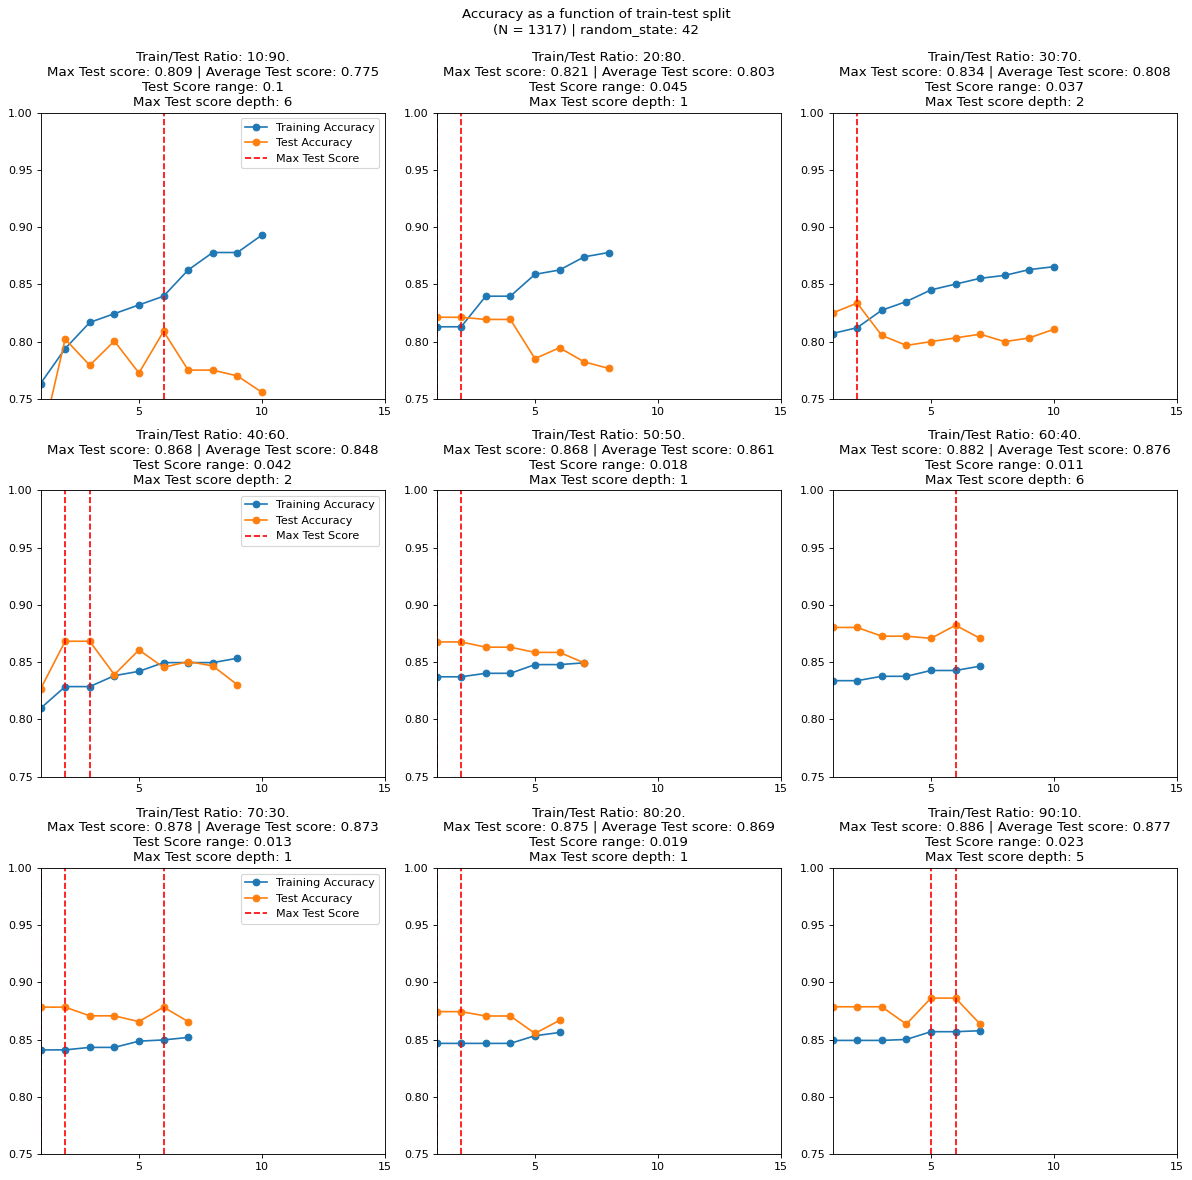

In [12]:
train_size = np.linspace(.1, .9, 9)
max_depths = list(range(1, 16)) # iterate over max depth

accuracy_dict = {}

for temp_size in train_size:
    accuracy_dict[temp_size] = {'train_score': [], 'test_score': []} # this time, instantiate train_score and test_score as empty lists onto which I will append accuracy values
    temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X, y, train_size = temp_size, random_state = 42, stratify = stratify_col)
    for temp_depth in max_depths:
        temp_tree = DecisionTreeClassifier(max_depth = temp_depth).fit(temp_X_train, temp_y_train)
        
        accuracy_dict[temp_size]['train_score'].append(temp_tree.score(temp_X_train, temp_y_train))
        accuracy_dict[temp_size]['test_score'].append(temp_tree.score(temp_X_test, temp_y_test))

# create graphs with random state 42
plt.figure(figsize = (15, 15), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.suptitle('Accuracy as a function of train-test split\n(N = 1317) | random_state: 42\n')

ax_count = 1
for train_size in list(accuracy_dict.keys()):
    temp_test_scores = accuracy_dict[train_size]['test_score']
    temp_train_scores = accuracy_dict[train_size]['train_score']

    # reshape scores, to only include non-repeated training scores (where nodes have all become pure)
    temp_max_train_index = np.min( np.array(range(1,16))[temp_train_scores == np.max(temp_train_scores)] ) # this becomes final value
    #temp_index = list(range(0, temp_max_train_index))

    temp_test_scores = temp_test_scores[0:temp_max_train_index]
    temp_train_scores = temp_train_scores[0:temp_max_train_index]
    
    plt.subplot(3, 3, ax_count)
    plt.plot(list(range(1, temp_max_train_index+1)), temp_train_scores, label = 'Training Accuracy', marker = 'o')
    plt.plot(list(range(1, temp_max_train_index+1)), temp_test_scores, label = 'Test Accuracy', marker = 'o')
    
    max_test_scores = np.array(range(1, temp_max_train_index+1))[temp_test_scores == np.max(temp_test_scores)]
    max_score_count = 1
    for max_test_score in max_test_scores:
        if max_score_count == 1:
            first_max_test_score = max_test_score
            plt.axvline(x = max_test_score, color = 'red', linestyle = '--', label = 'Max Test Score')
        else:
            plt.axvline(x = max_test_score, color = 'red', linestyle = '--')
        max_score_count += 1
    temp_train_prop = int(round(train_size*100,0))
    
    plt.title(f'Train/Test Ratio: {temp_train_prop}:{100-temp_train_prop}.\nMax Test score: {round(np.max(temp_test_scores),3)} | Average Test score: {round(np.mean(temp_test_scores),3)}\nTest Score range: {round(np.max(temp_test_scores)-np.min(temp_test_scores),3)}\nMax Test score depth: {first_max_test_score}')
    if ax_count % 3 == 1:
        plt.legend()
    plt.ylim(bottom = 0.75, top = 1)
    plt.xlim((1, 10))
    plt.xticks([5, 10, 15])
    ax_count += 1

plt.tight_layout()
#plt.savefig('accuracy_plots_trainProportion_42.png')

It's possible that there's a quadratic relationship b/t test score range and max depth.

In [13]:
What about an unstratified version of this?

Object `this` not found.


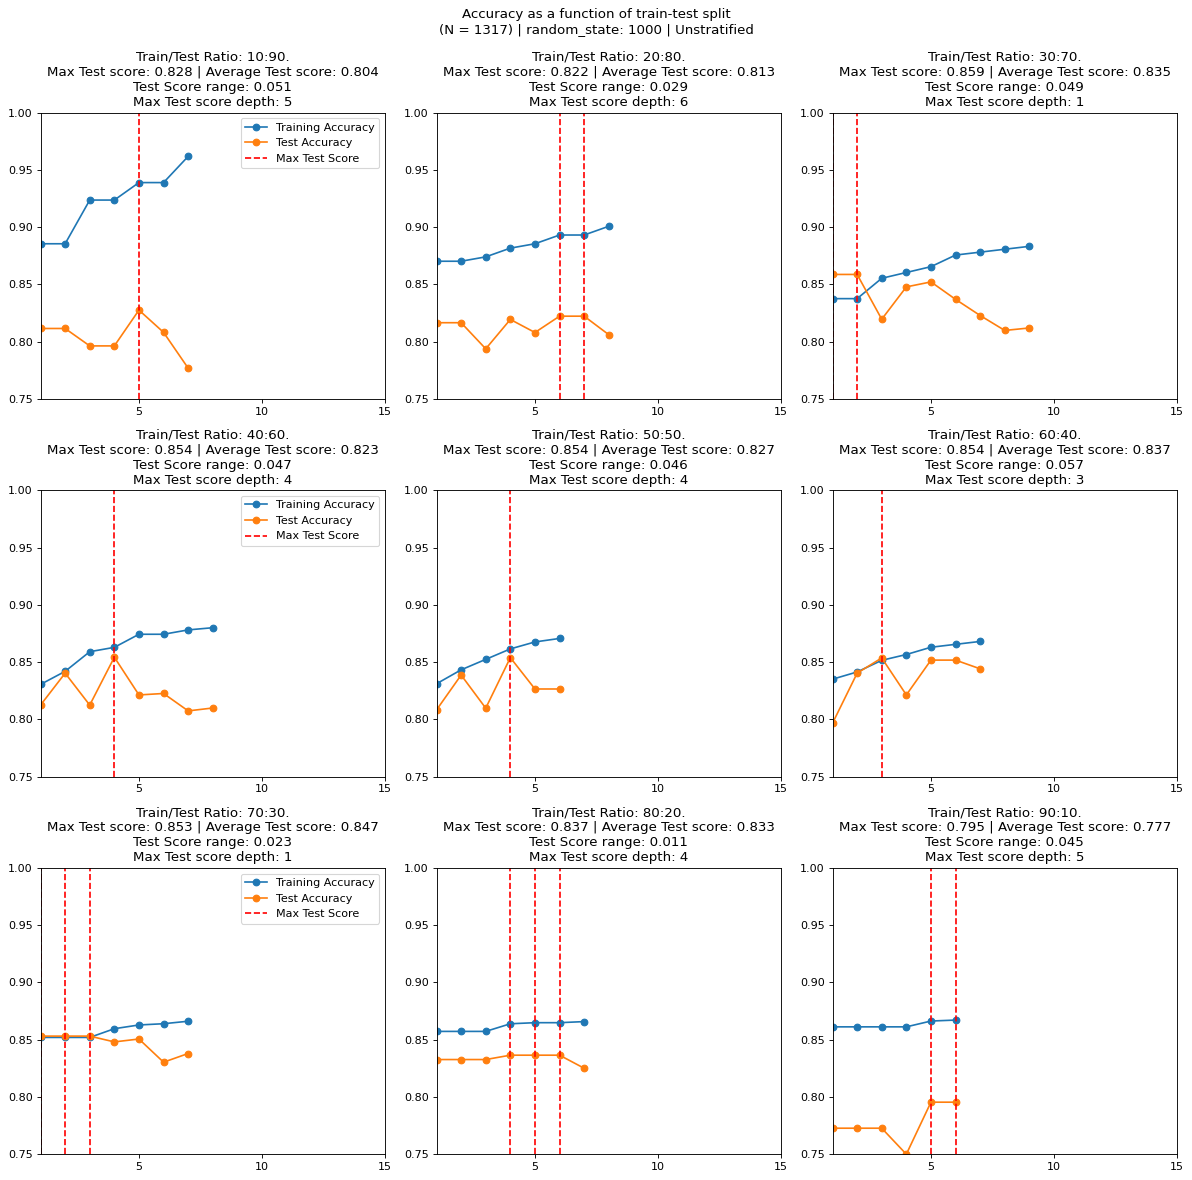

In [14]:
train_size = np.linspace(.1, .9, 9)
max_depths = list(range(1, 16)) # iterate over max depth

accuracy_dict = {}

for temp_size in train_size:
    accuracy_dict[temp_size] = {'train_score': [], 'test_score': []} # this time, instantiate train_score and test_score as empty lists onto which I will append accuracy values
    temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X, y, train_size = temp_size, random_state = universal_random_seed)
    for temp_depth in max_depths:
        temp_tree = DecisionTreeClassifier(max_depth = temp_depth).fit(temp_X_train, temp_y_train)
        
        accuracy_dict[temp_size]['train_score'].append(temp_tree.score(temp_X_train, temp_y_train))
        accuracy_dict[temp_size]['test_score'].append(temp_tree.score(temp_X_test, temp_y_test))

# create graphs with random state 42
plt.figure(figsize = (15, 15), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.suptitle(f'Accuracy as a function of train-test split\n(N = 1317) | random_state: {universal_random_seed} | Unstratified\n')

ax_count = 1
for train_size in list(accuracy_dict.keys()):
    temp_test_scores = accuracy_dict[train_size]['test_score']
    temp_train_scores = accuracy_dict[train_size]['train_score']

    # reshape scores, to only include non-repeated training scores (where nodes have all become pure)
    temp_max_train_index = np.min( np.array(range(1,16))[temp_train_scores == np.max(temp_train_scores)] ) # this becomes final value
    #temp_index = list(range(0, temp_max_train_index))

    temp_test_scores = temp_test_scores[0:temp_max_train_index]
    temp_train_scores = temp_train_scores[0:temp_max_train_index]
    
    plt.subplot(3, 3, ax_count)
    plt.plot(list(range(1, temp_max_train_index+1)), temp_train_scores, label = 'Training Accuracy', marker = 'o')
    plt.plot(list(range(1, temp_max_train_index+1)), temp_test_scores, label = 'Test Accuracy', marker = 'o')
    
    max_test_scores = np.array(range(1, temp_max_train_index+1))[temp_test_scores == np.max(temp_test_scores)]
    max_score_count = 1
    for max_test_score in max_test_scores:
        if max_score_count == 1:
            first_max_test_score = max_test_score
            plt.axvline(x = max_test_score, color = 'red', linestyle = '--', label = 'Max Test Score')
        else:
            plt.axvline(x = max_test_score, color = 'red', linestyle = '--')
        max_score_count += 1
    temp_train_prop = int(round(train_size*100,0))
    
    plt.title(f'Train/Test Ratio: {temp_train_prop}:{100-temp_train_prop}.\nMax Test score: {round(np.max(temp_test_scores),3)} | Average Test score: {round(np.mean(temp_test_scores),3)}\nTest Score range: {round(np.max(temp_test_scores)-np.min(temp_test_scores),3)}\nMax Test score depth: {first_max_test_score}')
    if ax_count % 3 == 1:
        plt.legend()
    plt.ylim(bottom = 0.75, top = 1)
    plt.xlim((1, 10))
    plt.xticks([5, 10, 15])
    ax_count += 1

plt.tight_layout()
plt.savefig('accuracy_plots_trainProportion_unstratified.png')